# ioNERDSS Python Package Tutorial for Multi-species Assembly

## 1. Dodecahedron Assembly Model

### 1.1 Model Setup

The model used in multi-species assembly will be the same as that in the single-species assembly. The only difference will be two types of species are defined, which are named A and B. Species A and B possess identical geometry structure and reaction properties. A and B will react with each other and with theirselves. Except the name of species and reaction informations, the other parameters are set to be the same as the output of function 'ioNERDSS.dode_face(radius = 40.0, sigma = 1.0)'. The input files are included under 'Dodecahedron' folder.

### 1.2 Simulation

Five paralleled simulations are run and thier output 'histogram_complexes_time.dat' file are named as 'histogram_complexes_time_dode_1.dat' to 'histogram_complexes_time_dode_5.dat' and ready to be analyzed.

### 1.3 Result Anlysis Steup

For detailed description and input requirements, please refer to the 'ioNERDSSUserGuide.doc' inside io_nerdss Github repository. Also, ioNERDSS package needed to be imported first.

In [2]:
import ioNERDSS as io

Next you must create a new MultiSpecies object that will store all of the histogram data. All future functions will be based off of this object.

In [3]:
multi_species = io.MultiHistogram(FileName="histograms/histogram_complexes_time_dode.dat",FileNum=5,InitialTime=0.0,FinalTime=1.0,SpeciesList=["A","B"])

### 1.4 Result Analysis

This includes all of the methods (or sub-functions) of the MultiSpecies object. All of these can be found in 2.1 and 2.3 in the UserGuide if you want more information.

#### 1.3.1 General multi-species histogram

This function creates a general histogram of total size of complex or selected species inside each complex for a multi-species system. The x-axis is the total number of monomers, and the y-axis is the relative frequency of each size.

Longer Description can be found under "``2.3.1 HISTOGRAM – Frequency of each complex size ``" in the UserGuide

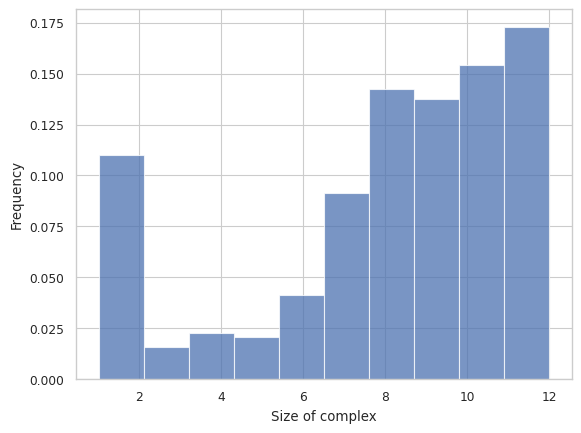

In [12]:
# Total count of monomers as x-axis
result = multi_species.hist_complex_count()

#### 1.3.2 STACKED HISTOGRAM – Counts of complex species with certain protein compositions (Broken)

Plots general histogram of total size of selected species for a multi-species system. Each bar is split into three stacked bars which represent the size distribution of another selected species compared to a desired input.

Longer Description can be found under "``2.3.2 STACKED HISTOGRAM – Counts of complex species with certain protein compositions``" in the UserGuide

Important Variables:
 - xAxis: This is this speices that will be displayed on the X axis. Must be in the initial species list!
   - If it is 'tot': Then it will be the count of both species
 - DivideSpecies: This is the species that will determine how each bar is split up. Must also be on the initial species list.
 - DivideSize: This is the count of the dividespecies that seperates the different colors of each bar. 
    - If it is 0, 1 color is when the dividespecies exists, 1 color is when it doesnt

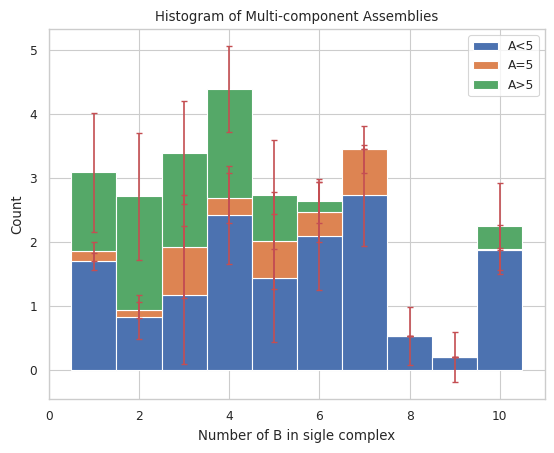

In [18]:
# Count of monomers B as x-axis, stacked by species name of A and size of 5
result = multi_species.stack_hist_complex_count(xAxis = 'B', DivideSpecies = 'A', DivideSize = 5)

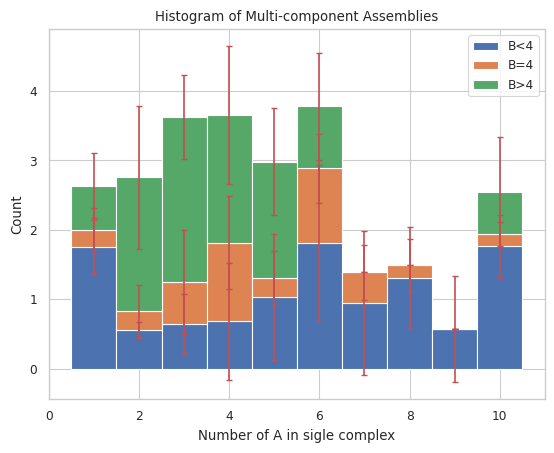

In [13]:
# Count of monomer A as x-axis, stacked by species name of B and size of 4
result = multi_species.stack_hist_complex_count(xAxis = 'A', DivideSpecies = 'B', DivideSize = 4)

#### 1.3.3 LINE GRAPH – max count of protein species in a single complex at a time

Creates a plot indicating maximum number of a specific protein species in single complex molecule during a certain time period. X-axis is time, and Y-axis is the largest # of the tracked protein in a single complex.

Find longer description under "``2.1.5 LINE GRAPH – max count of protein species in a single complex at a time``" in the UserGuide.

Important Variables:
 - SpeciesName: which species will include on the X axis. Must be in the original species list!
     - If you use 'tot': it will include all species

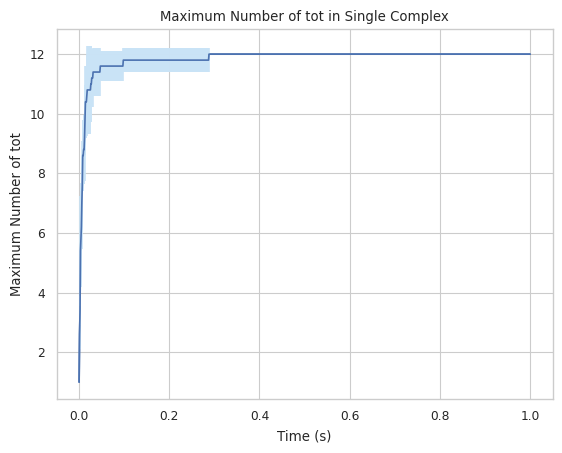

In [19]:
#finds largest complex size (includes all species)
result = multi_species.line_max_complex_size(SpeciesName = 'tot')

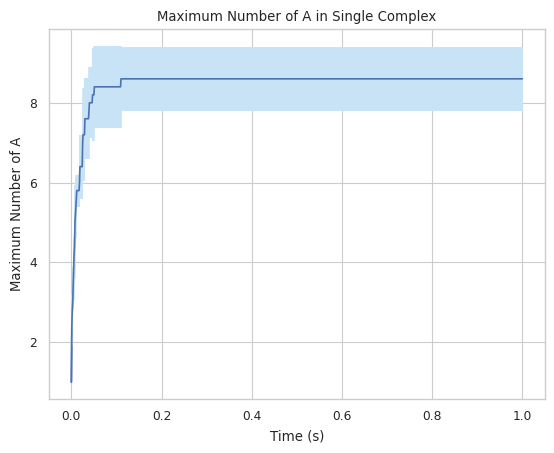

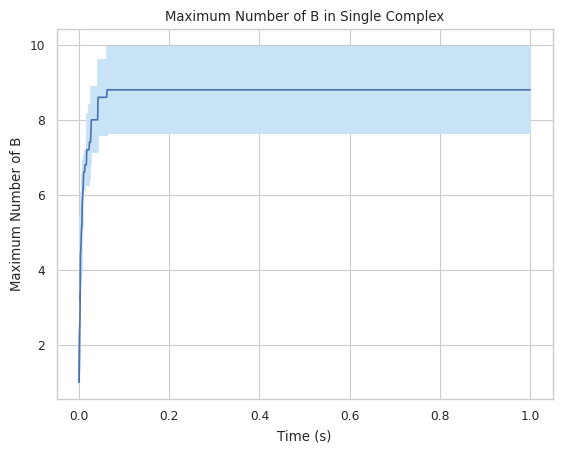

In [20]:
#finds maximum amount of A in a single complex
result = multi_species.line_max_complex_size(SpeciesName = 'A')

#finds maximum amount of B in a single complex
result = multi_species.line_max_complex_size(SpeciesName = 'B')

#### 1.3.4 LINE GRAPH – mean count of protein species in a single complex at a time

Creates a plot indicating averaged number of a specific protein species in single complex molecule during a certain time period. X-axis is time, and Y-axis is the average # of the tracked protein in a single complex.

Find longer description under "``2.1.6 LINE GRAPH – mean count of protein species in a single complex at a time ``" in the UserGuide.

Important Variables:
 - SpeciesName: which species will include on the X axis. Must be in the original species list!
     - If you use 'tot': it will include all species

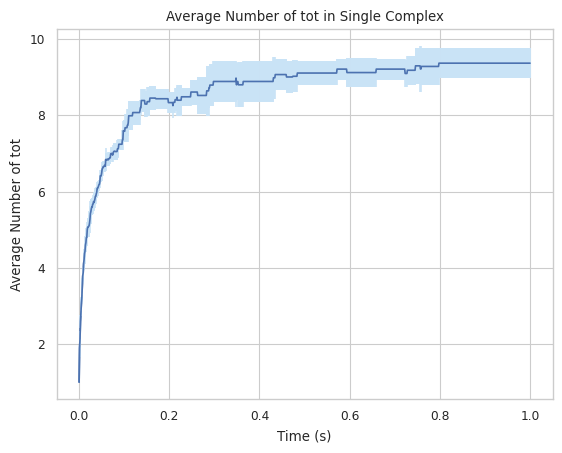

In [21]:
#finds largest complex size (includes all species)
result = multi_species.line_mean_complex_size(SpeciesName = 'tot')

#### 1.3.5 CSV – stores count of each complex type for each timestep

This function enables users to convert the raw .dat file to a .csv file for multi-species system. Each column in the data frame includes the simulation time and selected occurrences of species during the simulation; each row is separated by a different simulation time.

Find longer description under "``2.1.4 CSV – stores count of each complex type for each timestep``" in the UserGuide.

In [12]:
#will create a file called 'test_histogram.csv' in this directory when run.
result = multi_species.hist_to_csv(OpName="test_histogram")

#### 1.3.6 DATAFRAME – stores count of each complex type for each timestep  

This function enables users to convert the raw .dat file to a data frame in python pandas package for multi-species system. Each column in the data frame includes the simulation time and selected occurrences of species during the simulation; each row is separated by a different simulation time.

Find longer description under "``2.1.3 DATAFRAME – stores count of each complex type for each timestep  ``" in the UserGuide.

In [3]:
#will create a dataframe without a csv file also being created
multi_species.hist_to_df(SaveCsv = False)

,Time(s):,A: 1. B: 0.,A: 0. B: 1.,A: 1. B: 1.,A: 3. B: 0.,A: 2. B: 0.,A: 2. B: 1.,A: 0. B: 3.,A: 0. B: 2.,A: 1. B: 2.,...,A: 9. B: 3.,A: 0. B: 10.,A: 10. B: 1.,A: 7. B: 3.,A: 8. B: 3.,A: 8. B: 4.,A: 6. B: 6.,A: 3. B: 8.,A: 0. B: 8.,A: 2. B: 8.
0,0.000,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001,88.8,88.4,2.4,0.4,3.0,0.6,0.2,3.6,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002,79.4,80.2,4.2,0.8,4.8,1.8,0.6,5.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003,70.4,71.4,6.2,1.2,6.0,2.4,0.2,5.6,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004,62.2,65.8,7.0,1.4,7.4,2.2,0.4,6.2,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.4,0.2,0.0,0.8,0.2,0.2,0.2,0.2,0.2
997,0.997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.4,0.2,0.0,0.8,0.2,0.2,0.2,0.2,0.2
998,0.998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.4,0.2,0.0,0.8,0.2,0.2,0.2,0.2,0.2
999,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.4,0.2,0.0,0.8,0.2,0.2,0.2,0.2,0.2


#### 1.3.7 3D HISTOGRAM - Average count of each complex composition over simulation time  

Generates a 3D histogram during a certain time period representing the distribution of size of selected species. The x and y axis are both desired individual components and the height of each column represents the relative occurrence probability of complex of corresponding size.

Important Variables:
 - xAxis: the species shown on the xAxis.
 - yAxis: the species shown on the yAxis.
 - x/yBarSize: how many species counts are included in each bar for each axis. Example: yBarSize = 2 means each y bar will be 0-2, 2-4, 4-6, ect.

Find longer description under "``2.3.4 3D HISTOGRAM - Average count of each complex composition over simulation time``" in the UserGuide.

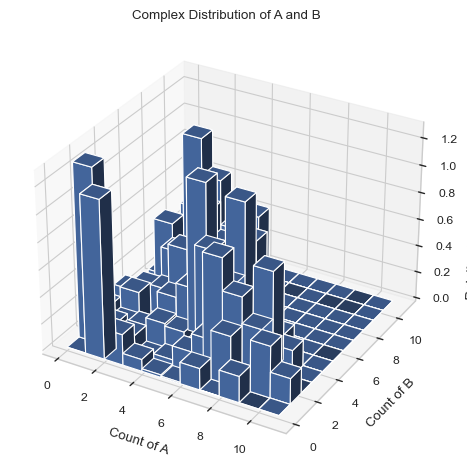

In [4]:
#creates a 3D graph with A on the X axis and B on the y axis. Each bar includes only 1 species size.
result = multi_species.hist_3D_complex_dist(xAxis = 'A', yAxis = 'B', xBarSize = 1, yBarSize = 1)

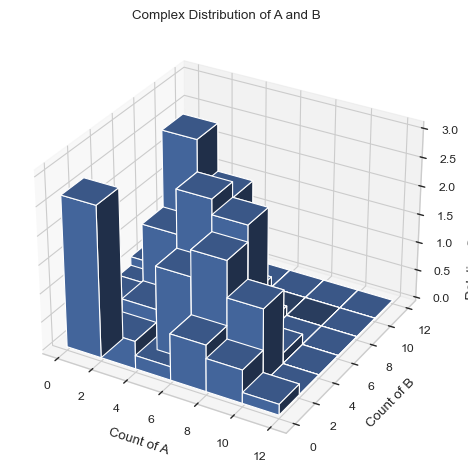

In [5]:
#creates a 3D graph with A on the X axis and B on the y axis. Each bar includess 2 species sizes.
result = multi_species.hist_3D_complex_dist(xAxis = 'A', yAxis = 'B', xBarSize = 2, yBarSize = 2)

#### 1.3.8 HEATMAP – Average count of each complex composition over simulation time

This function enables users to generate a heatmap during a certain time period representing the distribution of size of selected species. The x and y axis are both desired individual components and the color of each square represents the relative occurrence probability of complex of corresponding size.

Important Variables:
 - xAxis: the species shown on the xAxis.
 - yAxis: the species shown on the yAxis.
 - x/yBarSize: how many species counts are included in each bar for each axis. Example: yBarSize = 2 means each y bar will be 0-2, 2-4, 4-6, ect.
 - ShowMean: will show the mean of each square.
 - ShowStd: will show the std of each square
    - You can only have ShowMean or ShowStd enabled. If both are, the program will throw an error.

Find longer description under "``2.3.3 HEATMAP – Average count of each complex composition over simulation time``" in the UserGuide.

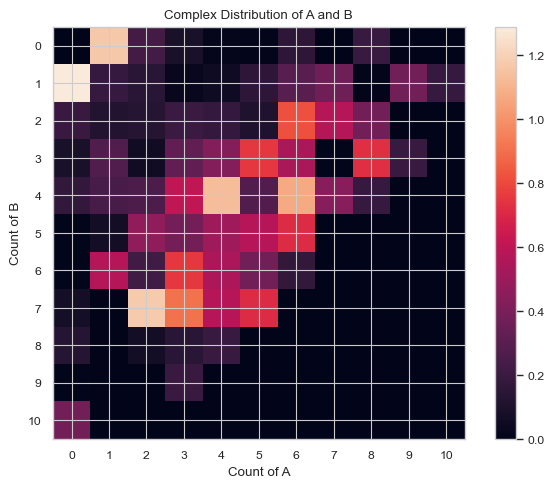

In [7]:
# heatmap without any values labeled. Each box only includes 1 species size.
result = multi_species.heatmap_complex_dist(xAxis = 'A', yAxis = 'B', xBarSize = 1, yBarSize = 1)

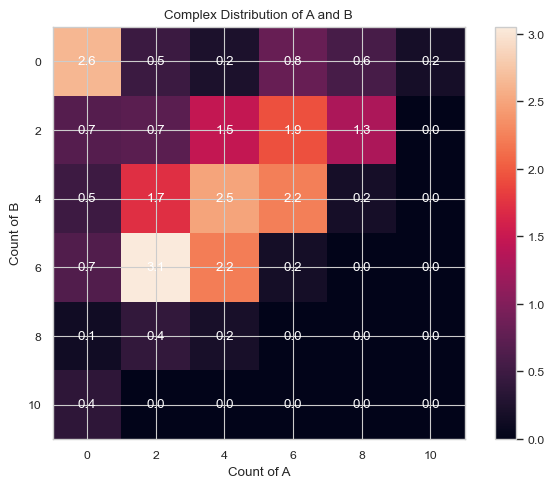

In [6]:
# heatmap with mean value labeled. Each box only includes 2 species sizes.
result = result = multi_species.heatmap_complex_dist(xAxis = 'A', yAxis = 'B', xBarSize = 2, yBarSize = 2, ShowMean = True)

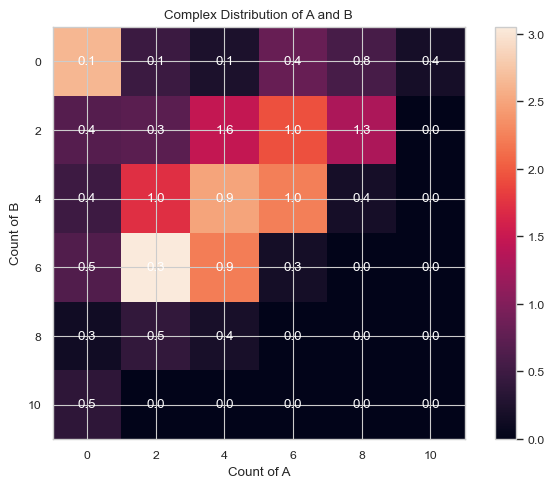

In [8]:
# heatmap with std value labeled. Each box only includes 2 species sizes.
result = multi_species.heatmap_complex_dist(xAxis = 'A', yAxis = 'B', xBarSize = 2, yBarSize = 2, ShowStd = True)

## 2. Clathrin-AP2 Assembly Model

### 2.1 Model Setup

There are 3 species presenting in the clathrin-ap2 model, which includes pip2, ap2 and clathrin. Pip2 is a membrane lipid and it is capable of binding ap2. Ap2 is a linear adaptor protein that can bind to both pip2 and clathrin. Clathrin is a protein that possess 6 interfaces, three of which are located in the same plain and are able to self-bind with other clathrin proteins; while the other three of its six interfaces can bind to the ap2 adaptor.


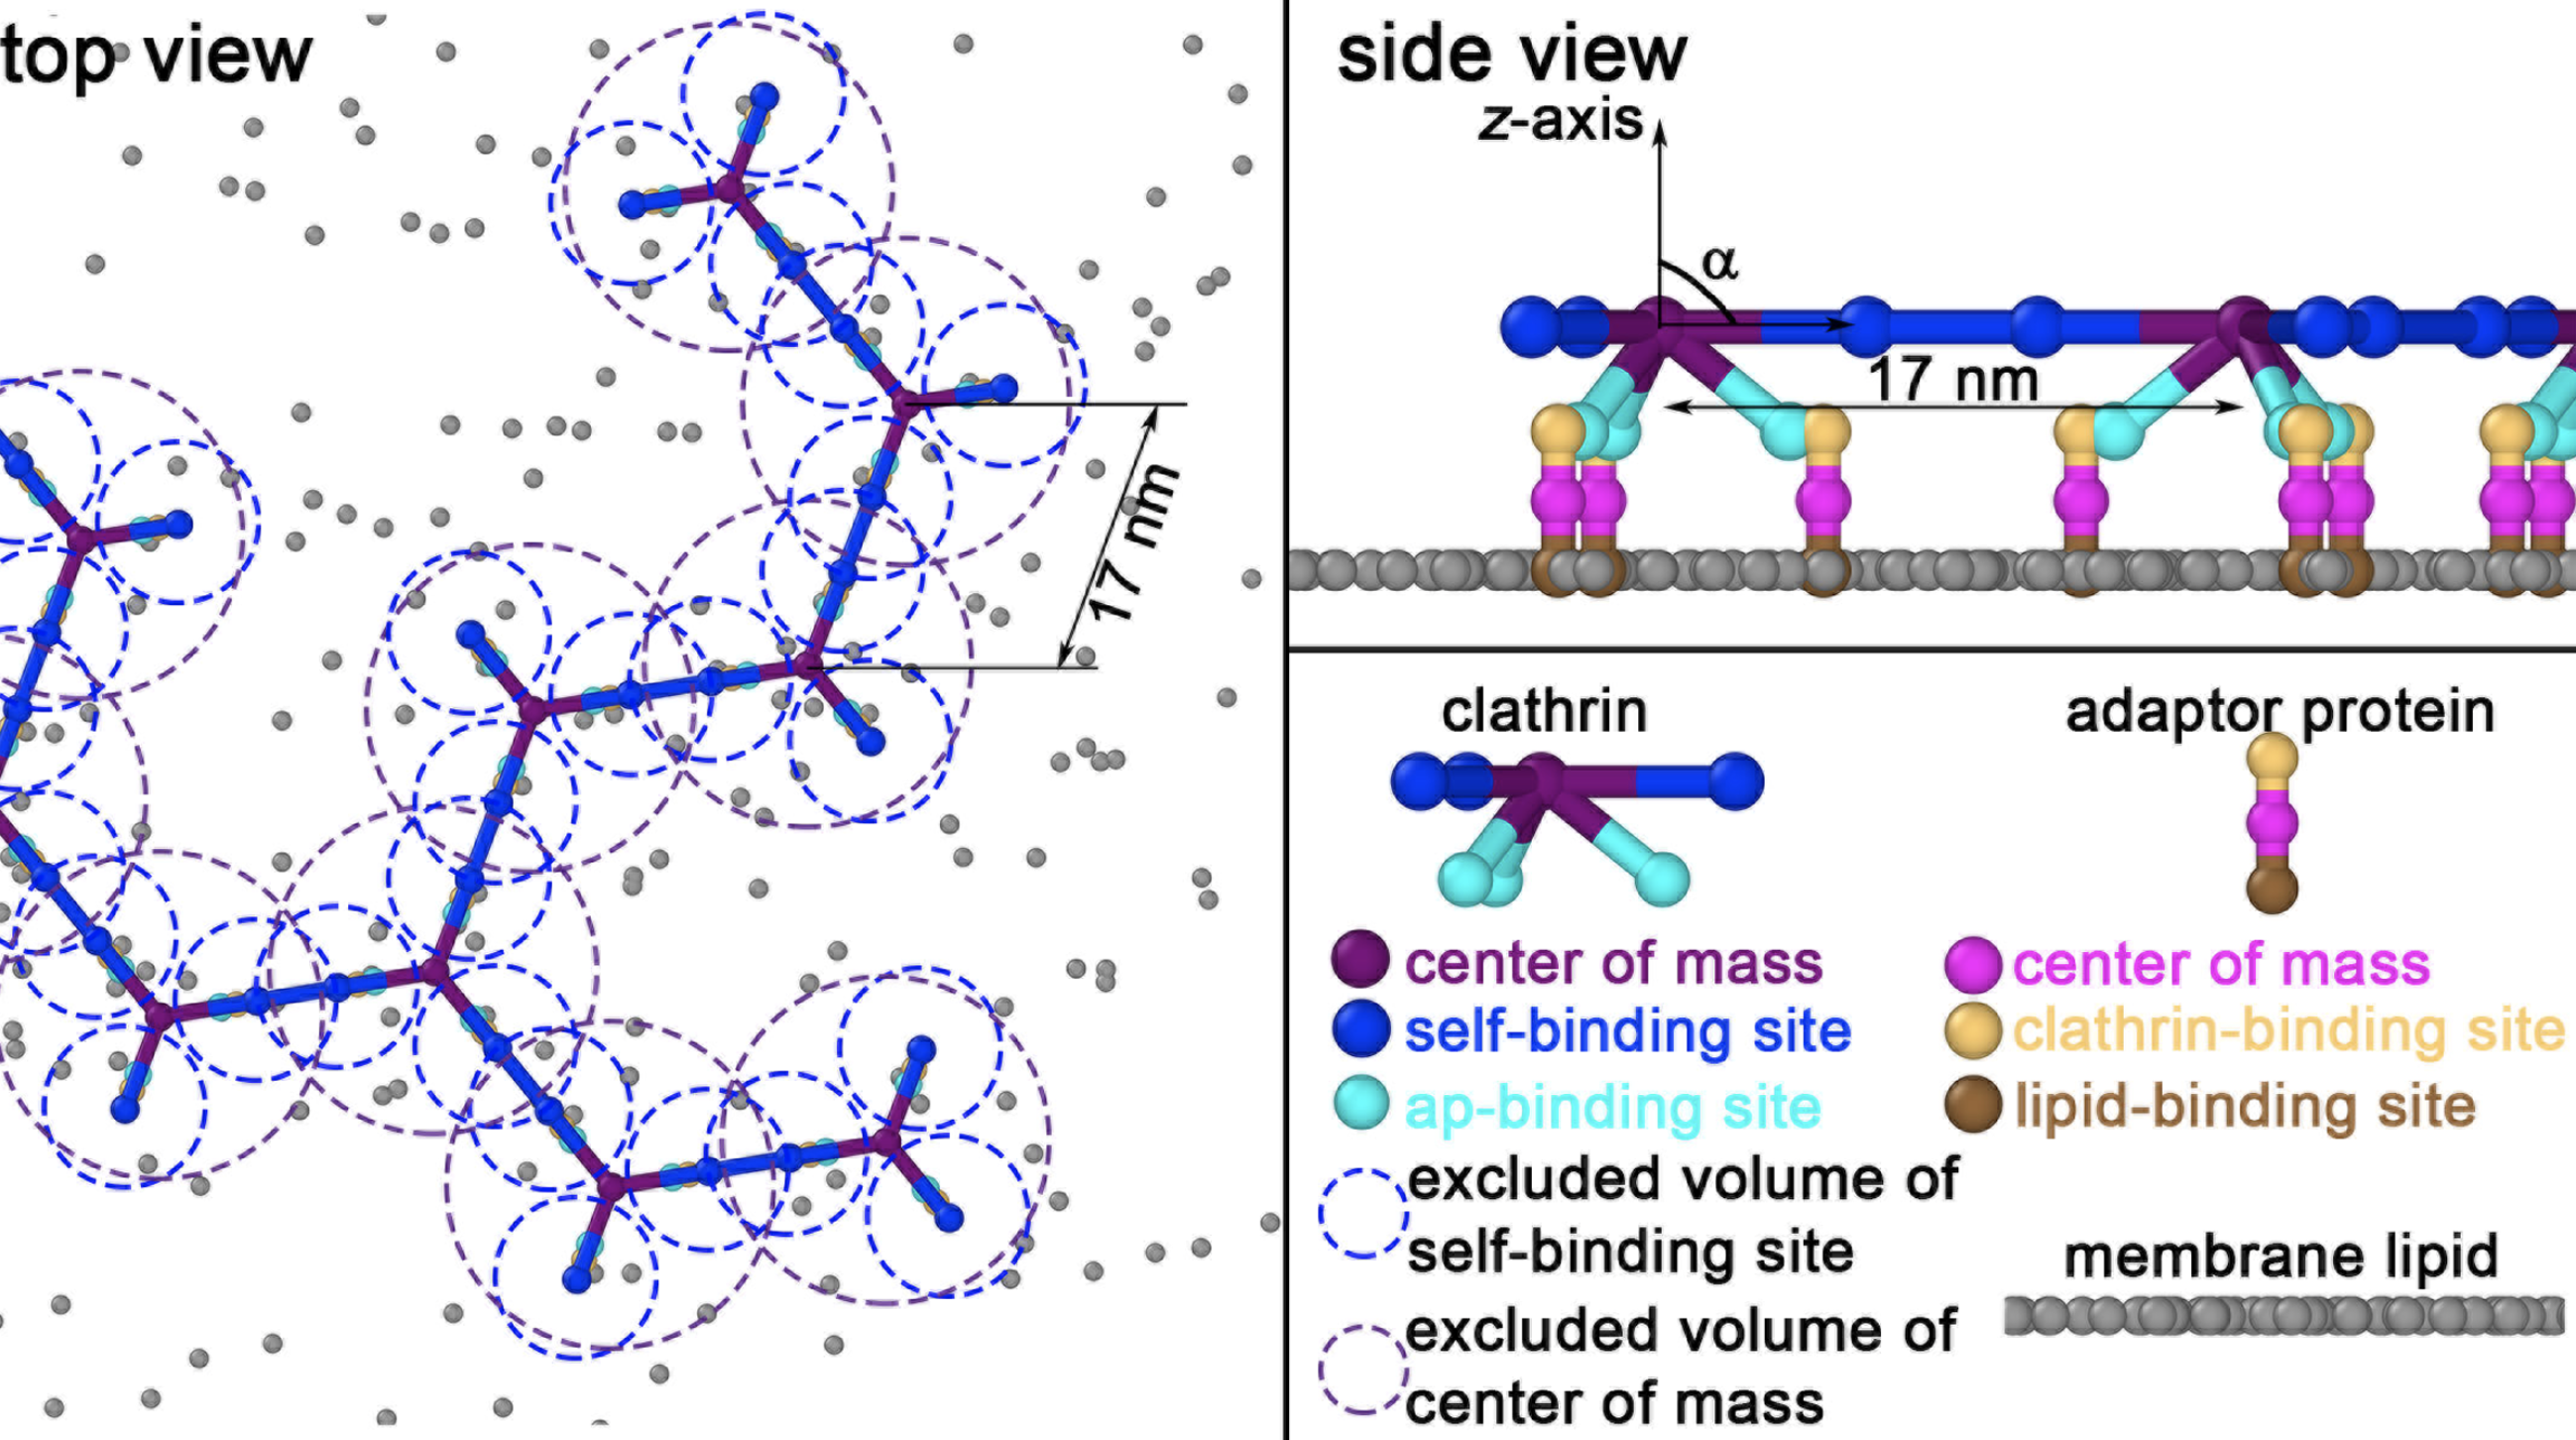


(Reference of figure above: Guo SK, Sodt AJ, Johnson ME. Large self-assembled clathrin lattices spontaneously disassemble without sufficient adaptor proteins. PLoS Comput Biol. 2022 Mar 21;18(3):e1009969. doi: 10.1371/journal.pcbi.1009969. PMID: 35312692; PMCID: PMC8979592.)

For the clathrin that is unbinded to ap2, its self-binding affinity is much lower than that binded to ap2. As a result, forming a large clathrin complex will be more likely to be observed when each monomer inside the complex is binded with ap2, while ap2-unbinded clathrin will only form some small complexes such as dimers or trimers.

### 2.2 Simulation

The input file can be found and downloaded from NERDSS reposirory (website: https://github.com/mjohn218/nerdss_development/tree/master/sample_inputs/clathrin_invitro_invivo/invivo). This simulation is suggested to be run with Rockfish or other supercomputers due to its huge number of literations.

Go to https://drive.google.com/file/d/1SzYpo8oR-X1EMWgsB3-g9Z5WUu1wBWn0/view?usp=sharing to download the output 'histogram_complexes_time_clat.dat' file of clathrin-ap2 assembly system into your local device. This file is apart from the original repository because its size is extremely large (above 1 GB) and exceeds the capacity of a single Github repository. Type in the entire path of the downloaded file into the cell below so that the analysis function will recognize the location of this histogram file.

**WARNING: All of these functions will take quite a while to run because of the size of the clathrin file**

In [6]:
# Type in your path here! (On windows, it seems to need to be relative, so if you have issues try putting it the same folder as this tutorial.)
FilePath = "../SampleSimulationsTutorial/ClathrinTutorial/ReadyToGoOutputFiles/1/histogram_complexes_time.dat"

In [7]:
#Initilize the object here
clathrin_hist = io.MultiHistogram(FileName=FilePath, FileNum = 1, InitialTime = 0, FinalTime = 608.064, SpeciesList = ['clat','pip2','ap2'])

### 2.3 Result Analysis

#### 2.3.1 Maximum complex changing line plot

Let's first examine the line plot of the maximum size of the complex with the change of time. From the graph below, the maximum complex size at the end of the simulation is around 200 with a large fluctuation if counted by the number of all species.

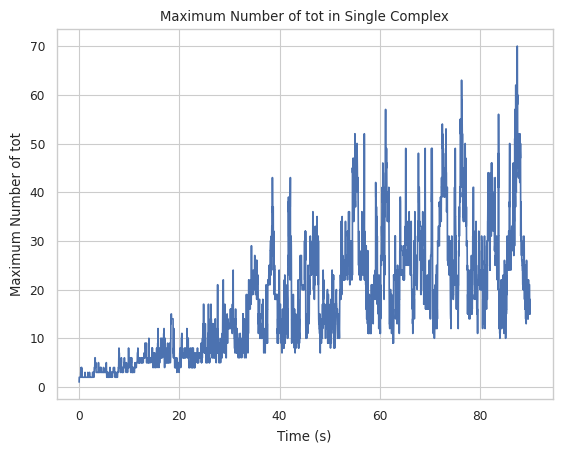

In [8]:
result = clathrin_hist.line_max_complex_size(SpeciesName = 'tot', SaveFig = False)

If counted by the number of only clathrin, the equilibrium size is about 80 after 100s.

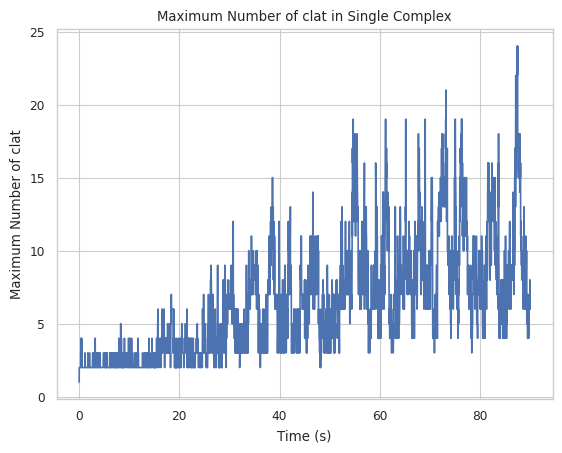

In [9]:
result = clathrin_hist.line_max_complex_size(SpeciesName = 'clat', SaveFig = False)

#### 2.3.2 Histogram

Then, let's examine the histogram. As can be seen from the histogram below, the 1-mers to 10-mers count for almost all of the overall distribution, so we adapt to remove the smaller size complex in the subsequent analysis.

NOTE: A recent update removed the ability to excludesize, this should be added back.

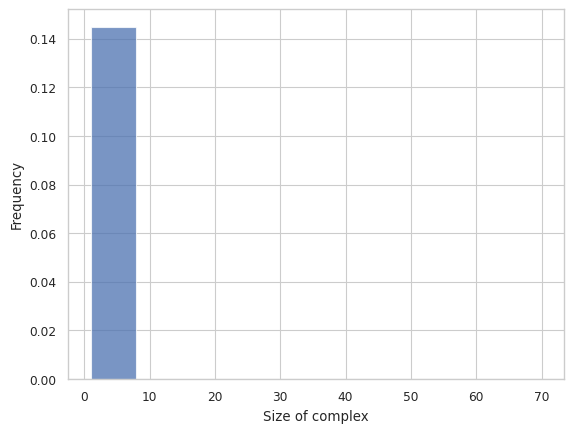

In [10]:
result = clathrin_hist.hist_complex_count(BinNums = 10)

#### 2.3.3 Stacked histogram

The two graphs show that in the absence of ap2 binding, clathrin cannot self-assemble to form a relativly large sized complex; and as the clathrin complex forms, more and more ap2 will also bind into it.

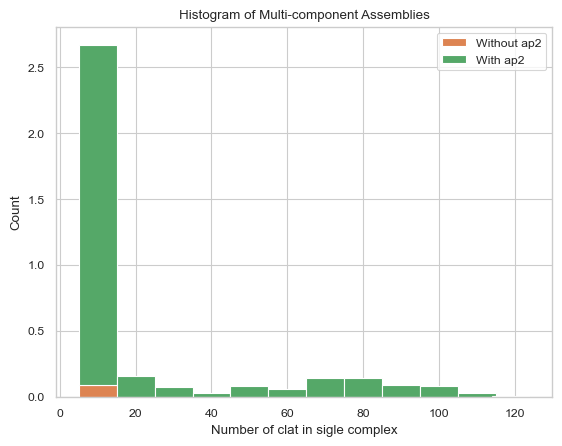

In [4]:
# The graph below is the stacked histogram of only clathrin excluding the complex size below 3, 
# stacked by with/without AP2.
result = clathrin_hist.stack_hist_complex_count(xAxis = 'clat',  DivideSpecies = 'ap2', DivideSize = 0, \
                               BarSize = 10, ExcludeSize = 3)

In [13]:
# The graph below is the stacked histogram of only clathrin excluding the complex size below 50, 
# stacked by AP2 with size of 70.
result = clathrin_hist.stack_hist_complex_count(xAxis = 'clat', \
                               DivideSpecies = 'ap2', DivideSize = 70, \
                               BarSize = 10, ExcludeSize = 50)

UnboundLocalError: cannot access local variable 'n_list' where it is not associated with a value